[Data in Kaggle](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv)

# Import the libraries

In [2]:
import pandas as pd

# Read the data

In [3]:
df = pd.read_csv("athlete_events.csv")
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Don't forget to drop duplicates first

In [4]:
df = df.drop_duplicates()
df.shape

(269731, 15)

# <font color='red'>**Beginner level**</font>

### Find the missing data in each column

In [5]:
df.isnull().sum() / len(df) * 100

ID         0.000000
Name       0.000000
Sex        0.000000
Age        3.453441
Height    21.804687
Weight    22.810504
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.254939
dtype: float64

In [6]:
c = df.isnull().any()
c[c].index

Index(['Age', 'Height', 'Weight', 'Medal'], dtype='object')

In [7]:
df.loc[df.isnull().any(axis=1), df.isnull().any()]

,Age,Height,Weight,Medal
0,24.0,180.0,80.0,NaN
1,23.0,170.0,60.0,NaN
2,24.0,NaN,NaN,NaN
3,34.0,NaN,NaN,Gold
4,21.0,185.0,82.0,NaN
...,...,...,...,...
271111,29.0,179.0,89.0,NaN
271112,27.0,176.0,59.0,NaN
271113,27.0,176.0,59.0,NaN
271114,30.0,185.0,96.0,NaN


### Number of males and females

In [8]:
df.groupby("Sex")["Sex"].count()

Sex
F     74378
M    195353
Name: Sex, dtype: int64

In [9]:
df["Sex"].value_counts()

Sex
M    195353
F     74378
Name: count, dtype: int64

### How many cities do we have and what are they ?

In [10]:
print(f"We hvae {df["City"].nunique()} cities.")
print(df["City"].unique())

We hvae 42 cities.
['Barcelona' 'London' 'Antwerpen' 'Paris' 'Calgary' 'Albertville'
 'Lillehammer' 'Los Angeles' 'Salt Lake City' 'Helsinki' 'Lake Placid'
 'Sydney' 'Atlanta' 'Stockholm' 'Sochi' 'Nagano' 'Torino' 'Beijing'
 'Rio de Janeiro' 'Athina' 'Squaw Valley' 'Innsbruck' 'Sarajevo'
 'Mexico City' 'Munich' 'Seoul' 'Berlin' 'Oslo' "Cortina d'Ampezzo"
 'Melbourne' 'Roma' 'Amsterdam' 'Montreal' 'Moskva' 'Tokyo' 'Vancouver'
 'Grenoble' 'Sapporo' 'Chamonix' 'St. Louis' 'Sankt Moritz'
 'Garmisch-Partenkirchen']


# <font color='red'>**Intermediate level**</fond>

### Find the number of athlete for each year

In [13]:
print("# of athletes",df.groupby("Year")["ID"].count())

# of athletes Year
1896      380
1900     1898
1904     1301
1906     1733
1908     3069
1912     4040
1920     4292
1924     5570
1928     5238
1932     2817
1936     7146
1948     7383
1952     9358
1956     6434
1960     9235
1964     9480
1968    10479
1972    11959
1976    10502
1980     8937
1984    11588
1988    14676
1992    16413
1994     3160
1996    13780
1998     3605
2000    13821
2002     4109
2004    13443
2006     4382
2008    13602
2010     4402
2012    12920
2014     4891
2016    13688
Name: ID, dtype: int64


In [17]:
# but it might the same athlete enrol in different event
print("As we see some of them participate 3 times and other 7.")
df.loc[df[["ID","Year"]].duplicated(keep=False)].groupby(["Year", "Name"])["ID"].count().head()

As we see some of them participate 3 times and other 7.


Year  Name                            
1896  Alajos (Aljoz) Szokoly (-Szokol)    3
      Albin Georges Lermusiaux            4
      Alexander Viggo Jensen              7
      Alexandros Khalkokondylis           2
      Alexios Fetsis                      2
Name: ID, dtype: int64

In [20]:
# get number of athlete with no duplicated
print(df.groupby("Year")["ID"].nunique())

Year
1896      176
1900     1224
1904      650
1906      841
1908     2024
1912     2409
1920     2676
1924     3565
1928     3703
1932     2174
1936     5142
1948     5068
1952     5622
1956     4167
1960     6017
1964     6230
1968     6717
1972     8122
1976     7200
1980     6330
1984     8067
1988     9873
1992    11183
1994     1738
1996    10339
1998     2179
2000    10647
2002     2399
2004    10557
2006     2494
2008    10899
2010     2536
2012    10517
2014     2745
2016    11179
Name: ID, dtype: int64


### Which athlete participated the most? (his/her name and ID)

In [75]:
id = df.groupby("ID")["Name"].count().sort_values(ascending=False).index[0]
print(id)
print(df.loc[df["ID"] == id]["Name"].iloc[0])

106296
Heikki Ilmari Savolainen


In [77]:
df[["ID", "Name"]].value_counts().idxmax()

(106296, 'Heikki Ilmari Savolainen')

# <font color='red'>**Advanced level**</fond>

### Find the number of each medal for each year.
##### The output should look like this 
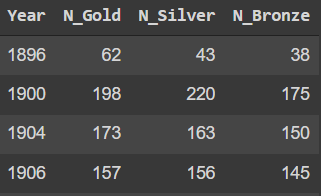

In [274]:
year = pd.Series([1896, 1900, 1904, 1906], name="Year")

data = pd.DataFrame(year)
a = (
    df.loc[df["Year"].isin(data["Year"].values)]
    .groupby("Year")["Medal"]
    .value_counts()
    .reset_index()
)
a = a.loc[a["Medal"] == "Gold"]["count"]

b = (
    df.loc[df["Year"].isin(data["Year"].values)]
    .groupby("Year")["Medal"]
    .value_counts()
    .reset_index()
)
b = b.loc[b["Medal"] == "Silver"]["count"]

c = (
    df.loc[df["Year"].isin(data["Year"].values)]
    .groupby("Year")["Medal"]
    .value_counts()
    .reset_index()
)
c = c.loc[c["Medal"] == "Bronze"]["count"]
data["N_Gold"] = a.values
data["N_Silver"] = b.values
data["N_Bronze"] = c.values
display(data)

,Year,N_Gold,N_Silver,N_Bronze
0,1896,62,43,38
1,1900,198,220,175
2,1904,173,163,150
3,1906,157,156,145


In [310]:
year = pd.Series([1896, 1900, 1904, 1906], name="Year")
data = pd.DataFrame(year)
data = data.set_index("Year")

medal_counts = df.loc[df["Year"].isin(year.values)].groupby(["Year", "Medal"]).size()
data["N_Gold"] = medal_counts.loc[:,"Gold"]
data["N_Silver"] = medal_counts.loc[:,"Silver"]
data["N_Bronze"] = medal_counts.loc[:,"Bronze"]


display(data.reset_index())


,Year,N_Gold,N_Silver,N_Bronze
0,1896,62,43,38
1,1900,198,220,175
2,1904,173,163,150
3,1906,157,156,145


# <font color='red'>**You are Geek!**</fond>

### What is the number of winners with the gold medal in each city?

In [235]:
df.loc[df["Medal"] == "Gold"].groupby("City")["Medal"].count()

City
Albertville                104
Amsterdam                  245
Antwerpen                  493
Athina                     883
Atlanta                    608
Barcelona                  559
Beijing                    671
Berlin                     312
Calgary                     87
Chamonix                    55
Cortina d'Ampezzo           51
Garmisch-Partenkirchen      36
Grenoble                    66
Helsinki                   306
Innsbruck                  131
Lake Placid                104
Lillehammer                110
London                    1215
Los Angeles                726
Melbourne                  290
Mexico City                359
Montreal                   438
Moskva                     457
Munich                     404
Nagano                     145
Oslo                        45
Paris                      475
Rio de Janeiro             665
Roma                       309
Salt Lake City             162
Sankt Moritz                71
Sapporo                     70
Sar

### Find the total missing data for each year?

In [234]:
df.drop("Year",axis=1).isnull().groupby(df["Year"]).sum().sum(axis=1)

Year
1896     1065
1900     5676
1904     3331
1906     5022
1908     8057
1912    10018
1920    11175
1924    15194
1928    14124
1932     6308
1936    18433
1948    20008
1952    22943
1956    13531
1960    10407
1964     9710
1968     9663
1972    11331
1976    10819
1980     8706
1984    11307
1988    14802
1992    20759
1994     3207
1996    15638
1998     3337
2000    12067
2002     3707
2004    11515
2006     3878
2008    11866
2010     3908
2012    11507
2014     4532
2016    12064
dtype: int64